# Exercise 1 - Python Notebook (Groupwork)
### Group 06<br>
Messner Johannes - Student_id: 11778880 <br>
Khrystyna Vasko - Student_id: 12307779 

The goal of this exercise is to get into some first contact with Python, Pandas data frames, and the many opportunities how to quickly generate static charts from data frames. For the first exercise, load the provided CSV file, do some data cleaning, and check if your cleaning operation was successful using visualization.

The main purpose of the notebook is to preprocess the CSV file for further visualization. The following steps have to be performed: 

1. Read the three CSV using Pandas. See the pandas.read_csv documentation to check how to parse the CSV correctly! Merge the two datasets player_data_per_36_min.csv and players.csv into one table. Add a team_name column to your new data frame based on the team_id column retrieving the name from the teams.csv dataset. You should now have a table that includes player info from players.csv, and players performance statistics from player_data_per_36_min.csv, and the team’s name from teams.csv. (3 points)
2. Take care of missing values. Sci-kit learn provides different data imputation methods. Remove unusable rows or columns, if necessary.  Delete all observations for players who do not have a current team.
(Hint: You may need to impute before you completely filter your dataframe. You need to make an educated judgment). (3 points)
3. Create two new tables: one that groups rows based on player_id, another that groups rows based on team_id. (2 points)
4. Visualize the data (twice). Every submitted notebook should contain at least two visualizations using at least two different Python visualization libraries. One visualization for each data set (players and teams). A list of the most wide-spread Python visualization libraries can be found in this article. You must concisely describe and explain each visualization and your decisions in a Markdown field. You will not receive the points for this task if you did not add a description/explanation. (max. 5 points per visualization)
5. Save the resulting tables (players data, and aggregated teams data) as CSV. To be sure that the data is correctly saved, you can load it again. You will have to work with these table for the second exercise. (2 points)

#### 1. Import all necessary libraries

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task 1</b>

Read all the CSV files and merge them in one dataframe:

In [5]:
players_df = pd.read_csv('data/players.csv')
teams = pd.read_csv('data/teams.csv')
player_data_df = pd.read_csv('data/player_data_per_36_min.csv')


Merge the files combining data from "players_df" and "player_data_df", where each row corresponds to a player with matching IDs in both DataFrames and then merge the new datafram with the teams.csv file:

In [6]:
merged_df = pd.merge(players_df, player_data_df, how='inner', left_on='id', right_on='player_id', suffixes=('_players', '_player_data'))
merged_df = pd.merge(merged_df, teams, how='left', left_on='current_team_id', right_on='team_id')
print(merged_df.columns)

Index(['id_players', 'name', 'full_name', 'position', 'height', 'weight',
       'birth_date', 'birth_place', 'retired', 'player_url', 'current_team_id',
       'teams', 'text', 'id_player_data', 'player_id', 'season',
       'total_games_x', 'games_started', 'minutes_played', 'fg', 'fga', 'fgp',
       'fg3', 'fg3a', 'fg3p', 'fg2', 'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'team_id',
       'team_name', 'short_name', 'years', 'total_games_y', 'total_wins',
       'total_losses', 'win_loss_percentage', 'champions', 'other_names',
       'link', 'active'],
      dtype='object')


<b>Task 2 </b>

In [10]:
imputer = SimpleImputer(strategy='mean')
merged_df[['games_started','minutes_played','fg','fga','fg3p','fg3','fg3a','fg2','fg2a', 'fg2p', 'ft','fta','orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']] = imputer.fit_transform(merged_df[['games_started','minutes_played','fg','fga','fg3p','fg3','fg3a','fg2','fg2a', 'fg2p', 'ft','fta','orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']])
merged_df.head()
desired_column = 'current_team_id'

if merged_df['current_team_id'].isnull().any():
    merged_df.loc[merged_df[desired_column].isnull(), desired_column] = 'Retired'
else:
   pass

print(merged_df['current_team_id'])

0        Retired
1        Retired
2        Retired
3        Retired
4        Retired
          ...   
26669       29.0
26670        3.0
26671       11.0
26672       16.0
26673        6.0
Name: current_team_id, Length: 26674, dtype: object


<b>Task 3</b>

Now we create the two new tables by calculating the average value for all the number values and we select the columns for the second table (teams):

In [12]:
player_df = merged_df.groupby(['player_id', 'name']).agg(lambda x: x.mean() if x.dtype=='float64' else x.iloc[0])

selected_col = merged_df.columns[merged_df.columns.get_loc('total_games_x'):merged_df.columns.get_loc('pts')+1] \
                .append(merged_df.columns[merged_df.columns.get_loc('total_games_y'):merged_df.columns.get_loc('win_loss_percentage')+1])

team_df = merged_df.groupby(['team_id', 'team_name'])[selected_col].agg(lambda x: x.mean() if x.dtype=='float64' else x.iloc[0])
print(team_df)
print(team_df.columns)

                                total_games_x  games_started  minutes_played  \
team_id team_name                                                              
1.0     Atlanta Hawks               51.845361      31.030928     1308.278351   
2.0     Boston Celtics              57.693548      32.338710     1493.532258   
3.0     Brooklyn Nets               50.027027      34.378378     1372.441441   
4.0     Charlotte Hornets           53.913793      26.931034     1243.517241   
5.0     Chicago Bulls               53.575758      30.803030     1373.742424   
6.0     Cleveland Cavaliers         49.986667      30.280000     1295.960000   
7.0     Dallas Mavericks            50.176991      22.415929     1131.292035   
8.0     Denver Nuggets              52.808989      27.449438     1281.561798   
9.0     Detroit Pistons             49.105263      27.657895     1235.973684   
10.0    Golden State Warriors       52.758065      39.951613     1510.387097   
11.0    Houston Rockets             53.4

<b> Task 4 </b>

This visualisation shows a scatter plot depicting the relationship between the successful three-point field goals per game and the number of attempts of the three-point field goals per game in the season 2017-18. The goal of it, is to see the a correlation between the two variables. The reason why we choose only one season is the amount of the available data. With more than one season visualized, it becomes more difficult to see patterns in the visualisation. 

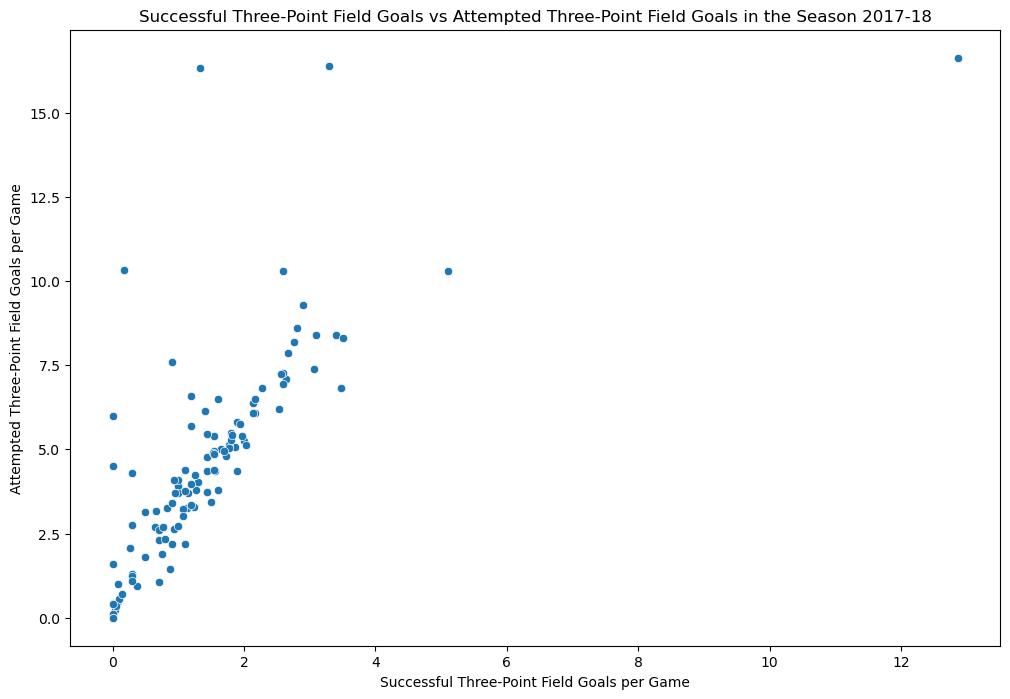

In [13]:
player_df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='fg3', y='fg3a', data=player_df[player_df['season'] == '2017-18'])
plt.title('Successful Three-Point Field Goals vs Attempted Three-Point Field Goals in the Season 2017-18')
plt.xlabel('Successful Three-Point Field Goals per Game')
plt.ylabel('Attempted Three-Point Field Goals per Game')
plt.show()

We can detect a clear correlation between the two variables, but also certain outliers (the top right outlier is probably Steph Curry). 

The visualization displays a bar plot showing the win-loss percentage for each active team of the NBA. We choose these two variables so we could se the average performance of all teams. Because the fact that in the original dataset there are a lot of seasons in total the win-loss percentage will be nearer the value of 0.5 than if we picked only one season. Thats why we choose to scale the y-axis between 0.35 and 0.65, so that it's easier for the reader to approximate the values and compare the teams. The 90-degree rotation of the description of the x-axis was done because of the length of the team names, otherwise the team names overlap each other.

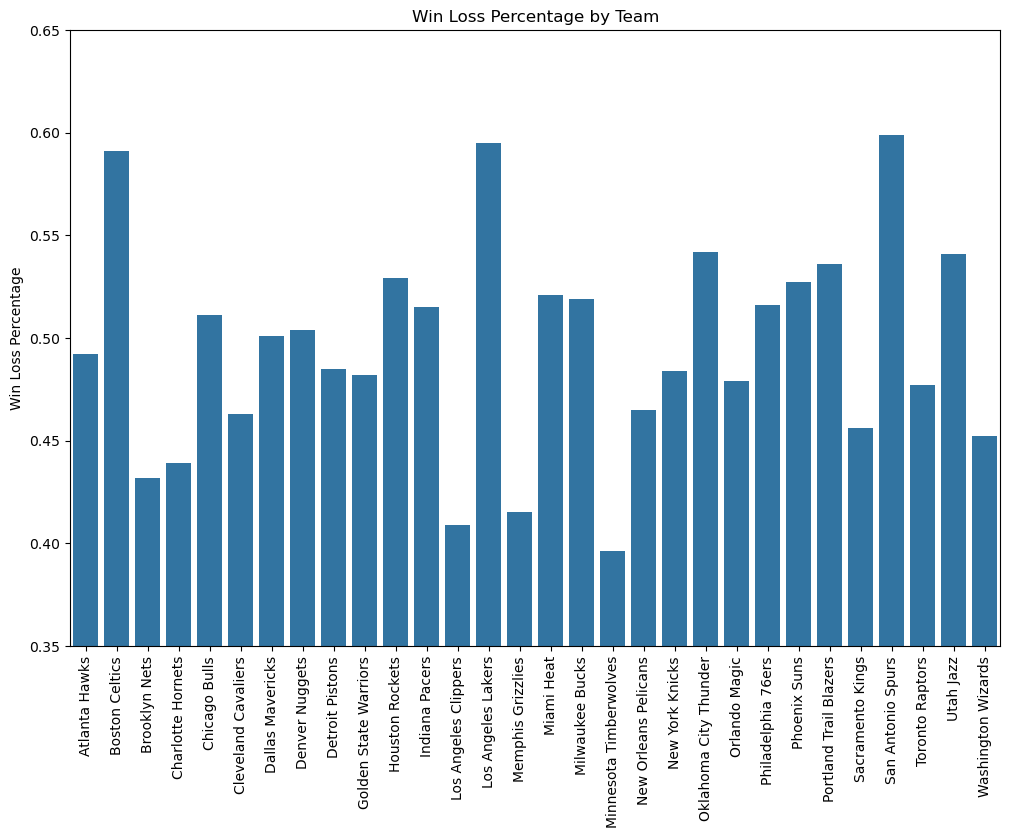

In [14]:
team_df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='win_loss_percentage', data=team_df)
plt.title('Win Loss Percentage by Team')
plt.xlabel('')
plt.ylabel('Win Loss Percentage')
plt.ylim(0.35, 0.65)
plt.xticks(rotation=90)
plt.show()

This visualization shows the trends of wins and losses of teams over the years. It allows us to observe how the total number of wins and losses have evolved over time

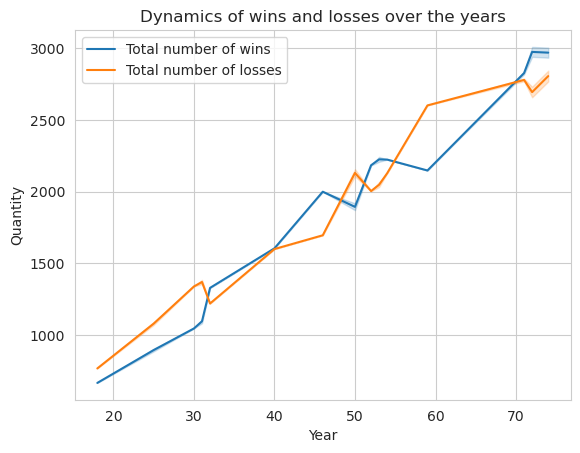

In [15]:
sns.set_style("whitegrid")
sns.lineplot(x='years', y='total_wins', data=merged_df, label='Total number of wins', estimator='mean')
sns.lineplot(x='years', y='total_losses', data=merged_df, label='Total number of losses', estimator='mean')
plt.title('Dynamics of wins and losses over the years')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.show()

<b>Task 5</b> Save the resulting tables (the cleaned player_data_per_36_min and the two new aggregated tables) as CSV. To be sure that the data is correctly saved, you can load it again. You will have to work with these tables for the second exercise. (2 points)

In [16]:
merged_df.to_csv('merged_df.csv')
player_df.to_csv('player_df.csv')
team_df.to_csv('team_df.csv')

merged_df2 = pd.read_csv('merged_df.csv')
player_df2 = pd.read_csv('player_df.csv')
team_df2 = pd.read_csv('team_df.csv')

print(merged_df2.head())
print(player_df2.head())
print(team_df2.head())
print(list(merged_df2.columns))
print(list(player_df2.columns))
print(list(team_df2.columns))

   Unnamed: 0  id_players            name       full_name position height  \
0           0           1  Alaa Abdelnaby  Alaa Abdelnaby      F-C   6-10   
1           1           1  Alaa Abdelnaby  Alaa Abdelnaby      F-C   6-10   
2           2           1  Alaa Abdelnaby  Alaa Abdelnaby      F-C   6-10   
3           3           1  Alaa Abdelnaby  Alaa Abdelnaby      F-C   6-10   
4           4           1  Alaa Abdelnaby  Alaa Abdelnaby      F-C   6-10   

   weight    birth_date   birth_place  retired  ... short_name years  \
0   240.0  June 24 1968  Cairo, Egypt     True  ...        NaN   NaN   
1   240.0  June 24 1968  Cairo, Egypt     True  ...        NaN   NaN   
2   240.0  June 24 1968  Cairo, Egypt     True  ...        NaN   NaN   
3   240.0  June 24 1968  Cairo, Egypt     True  ...        NaN   NaN   
4   240.0  June 24 1968  Cairo, Egypt     True  ...        NaN   NaN   

  total_games_y total_wins  total_losses  win_loss_percentage champions  \
0           NaN        NaN   